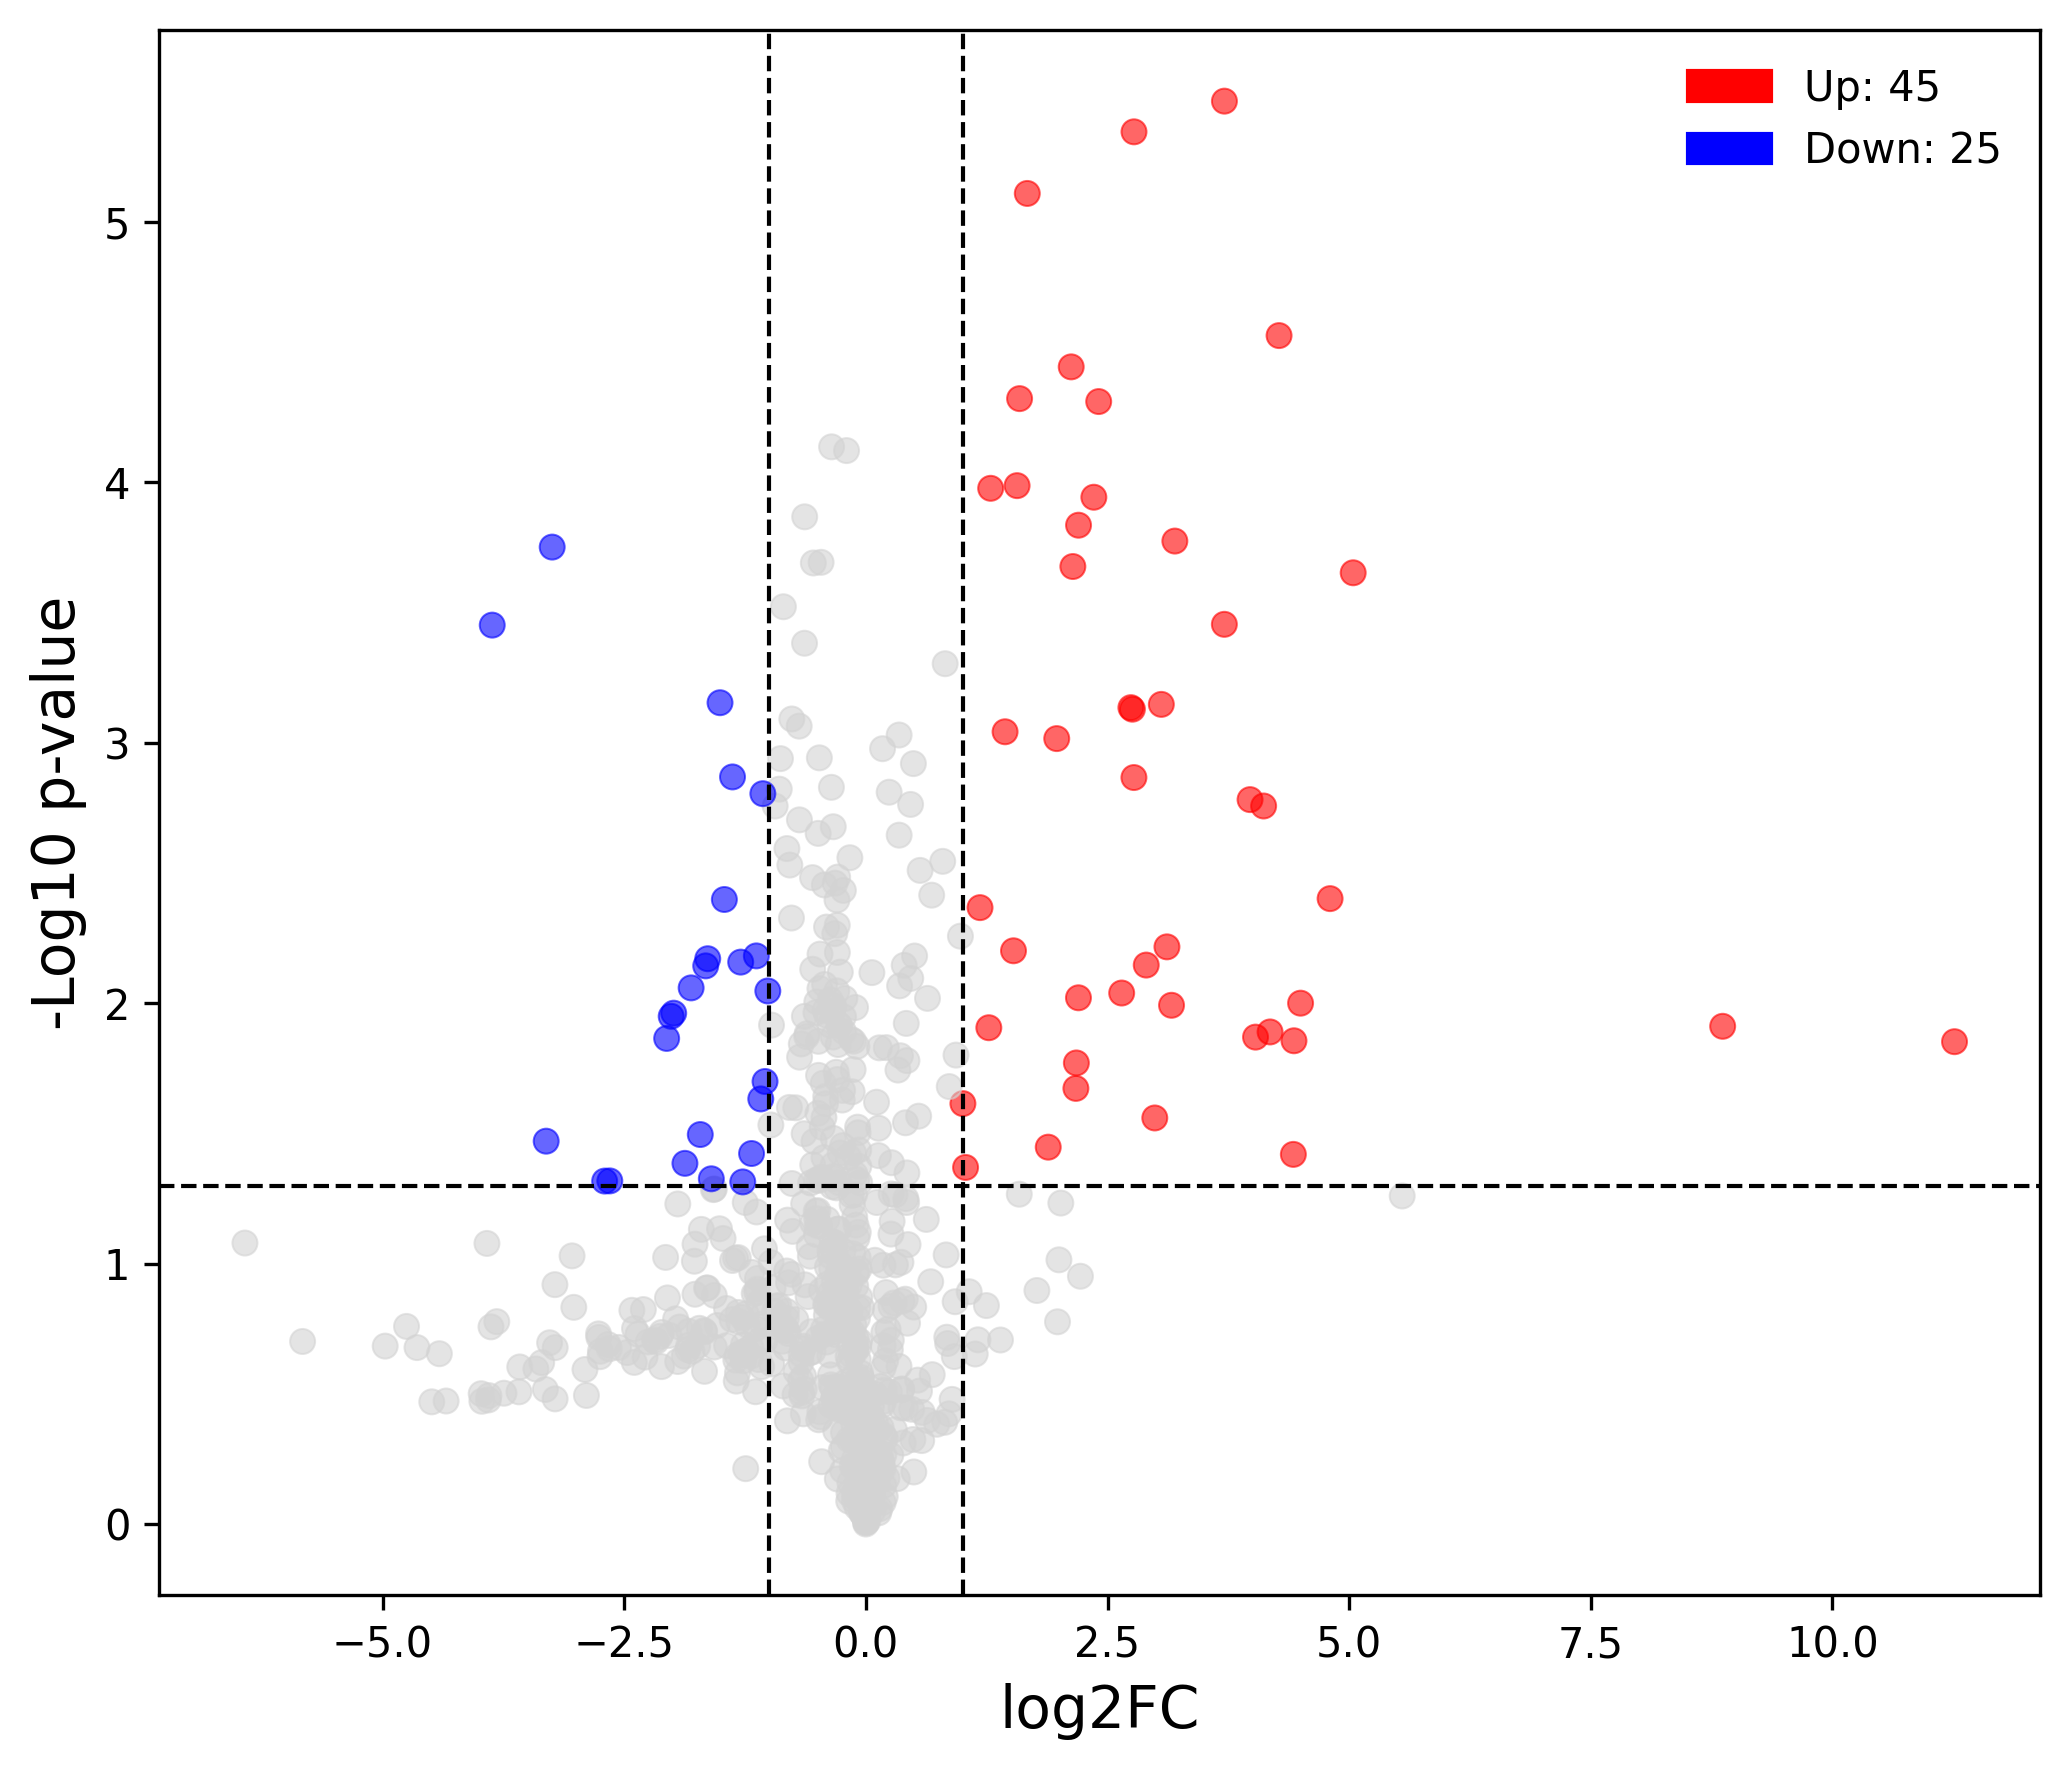

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load the processed Excel data file
df = pd.read_excel('result.xlsx')

# Compute -log10(p-value) for visualization
df['-logPValue'] = -np.log10(df['p_value'])

# Set fold-change and significance thresholds
x_threshold = np.log2(2)   # Fold change threshold: log2(2) = 1
y_threshold = 1.3          # p-value threshold: -log10(0.05) ≈ 1.3

# Classify each point as upregulated, downregulated, or not significant
def categorize(row):
    if row['log2FC'] > x_threshold and row['-logPValue'] > y_threshold:
        return 'up'
    elif row['log2FC'] < -x_threshold and row['-logPValue'] > y_threshold:
        return 'down'
    else:
        return 'normal'

# Apply classification to the dataframe
df['group'] = df.apply(categorize, axis=1)

# Remove rows with missing log2FC or p-value
df = df.dropna(subset=['log2FC', '-logPValue'])

# Define color mapping for each group
color_map = {'up': 'red', 'down': 'blue', 'normal': 'lightgray'}

# Create volcano plot
plt.figure(dpi=300, figsize=(7, 6))
sns.scatterplot(
    data=df, x='log2FC', y='-logPValue',
    hue='group', palette=color_map,
    alpha=0.6, edgecolor=None
)

# Add threshold lines
plt.axvline(x=x_threshold, color='black', linestyle='--', linewidth=1)
plt.axvline(x=-x_threshold, color='black', linestyle='--', linewidth=1)
plt.axhline(y=y_threshold, color='black', linestyle='--', linewidth=1)

# Set axis labels
plt.xlabel('log2FC', fontsize=14)
plt.ylabel('-Log10 p-value', fontsize=14)

# Customize legend showing the number of up/downregulated features
up_count = df['group'].value_counts().get('up', 0)
down_count = df['group'].value_counts().get('down', 0)
up_patch = mpatches.Patch(color='red', label=f'Up: {up_count}')
down_patch = mpatches.Patch(color='blue', label=f'Down: {down_count}')
plt.legend(handles=[up_patch, down_patch], loc='upper right', frameon=False)

# Remove grid and adjust layout
plt.grid(False)
plt.tight_layout()
plt.show()

# Reapply classification (optional redundancy)
def categorize(row):
    if row['log2FC'] > x_threshold and row['-logPValue'] > y_threshold:
        return 'up'
    elif row['log2FC'] < -x_threshold and row['-logPValue'] > y_threshold:
        return 'down'
    else:
        return 'normal'

# Save the dataframe with 'group' column to a new Excel file
df['group'] = df.apply(categorize, axis=1)
df.to_excel('result-clean_with_group.xlsx', index=False)
